# Global Processing using the Hough Transform (HT)

`Task # 01 Apply the Hough Tranform (HT) on a color image for detecting straight lines.`

*   Write your observations by changing the threshold on the accumulation votes.

In [132]:
# Import necessary libraries/packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [133]:
def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    return img_array

def display_images(images, titles,max_img_per_row=3,vmin=0,vmax=255,conversion=cv2.COLOR_BGR2RGB):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        # disp_image = cv2.cvtColor(images[i].astype(np.uint8),conversion)
        axs[i].imshow(images[i],cmap='grey', vmin=vmin, vmax=vmax)
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

def display_color_images(images, titles,max_img_per_row=3,vmin=0,vmax=255,conversion=cv2.COLOR_BGR2RGB):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        disp_image = cv2.cvtColor(images[i].astype(np.uint8),conversion)
        axs[i].imshow(disp_image)
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
def scale(array, max = 255):
    min_val = np.min(array)
    max_val = np.max(array)
    
    if max_val == min_val:
        return np.zeros_like(array, dtype=np.uint8)  # Avoid division by zero
    
    scaled_array = (array - min_val) / (max_val - min_val) * max
    return scaled_array.astype(np.uint8)

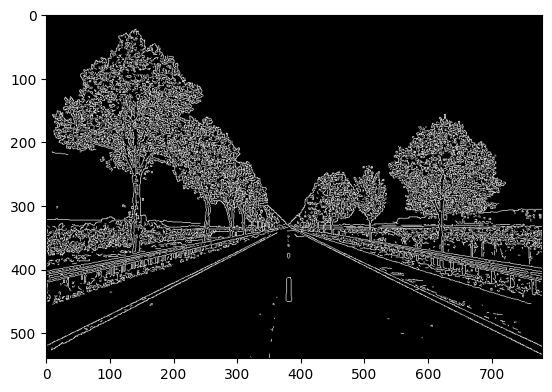

In [134]:
img = cv2.imread('image.jpg')

# Resize image
img = cv2.resize(img, (780, 540),
               interpolation = cv2.INTER_LINEAR)

# Convert the img to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply edge detection method on the image [Very Important preprocessing task]
# This will give a single-pixel thick edges
# Change the Lower and Upper thresholds and observe the changes
edges = cv2.Canny(gray, 100, 150, apertureSize=3)

plt.imshow(edges,cmap='grey')

**Descrption:** Apply the HT technique for Line detection.

In [135]:
# This returns an array of r and theta values
lines = cv2.HoughLines(edges, 1, np.pi/180, 315) # Accumulator threshold =350.

In [136]:
print(lines)

[[[143.          2.0071287]]

 [[346.          1.553343 ]]

 [[467.          1.1170107]]

 [[123.          2.042035 ]]

 [[263.          1.7453293]]]


**Description:** Draw the detected straight lines

In [137]:
# The below for loop runs till r and theta values
# are in the range of the 2d array
lines = np.array(lines)

print(lines.shape)




for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)


(5, 1, 2)


In [138]:
def draw_rotheta_line(img , ro,theta):
    
    arr = np.array([ro,theta], dtype=np.float64)
    r, theta = arr
    # Stores the value of cos(theta) in a
    a = np.cos(theta)

    # Stores the value of sin(theta) in b
    b = np.sin(theta)

    # x0 stores the value rcos(theta)
    x0 = a*r

    # y0 stores the value rsin(theta)
    y0 = b*r

    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta))
    x1 = int(x0 + 1000*(-b))

    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta))
    y1 = int(y0 + 1000*(a))

    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta))
    x2 = int(x0 - 1000*(-b))

    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta))
    y2 = int(y0 - 1000*(a))

    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (0,0,255) denotes the colour of the line to be
    # drawn. In this case, it is red.
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

In [139]:
img.shape

(540, 780, 3)

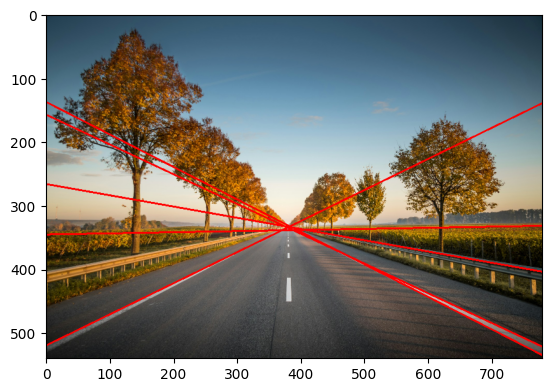

In [140]:
imd_disp = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
plt.imshow(imd_disp)

`Task # 02 Generate the Hough/Accumulator Space using the rho-theta parameters.` **[Complete This Task]**

a. Vote in the parameter space.

b. Display the Hough/Accumulator space.

In [141]:
# Code here

def line_drawer_new(space,space_rhotheta,point):
    
    max_rho = space.shape[0] // 2   
    max_theta = space.shape[1]
    y,x = point
    theta = np.linspace(-np.pi/2, np.pi/2 , max_theta)
    
    rho = x * np.cos(theta) + y * np.sin(theta)
    
    for i in range(space.shape[1]):
        space         [ int(rho[i]) + max_rho , i ] += 1
        space_rhotheta[int(rho[i])+max_rho,i,0] = rho[i]
        space_rhotheta[int(rho[i])+max_rho,i,1] = theta[i]
    return space 



In [142]:
# runaway = load_image_as_np_array("DIP3E_Original_Images_CH10/runaway.tif")
runaway_edge = edges


(429.0, (808, 25))

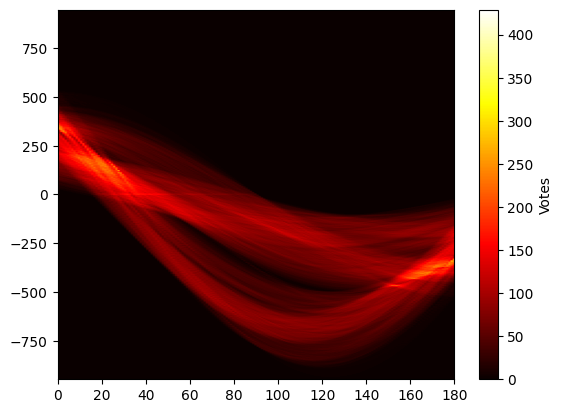

In [143]:
r , c = runaway_edge.shape

maxrho= int(np.sqrt(r*r + c*c))
maxangle = 180

space_rotheta = np.zeros(shape=(2*maxrho,maxangle,2))
space_vote = np.zeros(shape = (2*maxrho,maxangle) )

edge_thresh = 100


for i in range(runaway_edge.shape[0]):
    for j in range(runaway_edge.shape[1]):
        
        if runaway_edge[i,j] > edge_thresh:
           line_drawer_new(space_vote,space_rotheta,(i,j))
            
            
            
# display_images([space_vote],["result"])

plt.imshow(space_vote, cmap='hot', aspect='auto', extent=[0, 180, -maxrho, maxrho])
plt.colorbar(label='Votes')

np.max(space_vote),np.unravel_index(np.argmax(space_vote),shape=space_vote.shape)

`Task # 03 Display the detected straight lines` **[Home Assignment]**

a. Apply the Threshold on to the parameter space, and list the line parameters

b. Draw the lines on the input image.

In [144]:
# Code here.

print(space_rotheta.shape)
thresh = 325


for i in range(space_rotheta.shape[0]):
    for j in range(space_rotheta.shape[1]):
        rotheta = space_rotheta[i,j]
        
        if space_vote[i,j] > thresh:
            draw_rotheta_line(img, ro=rotheta[0],theta=rotheta[1])

(1896, 180, 2)


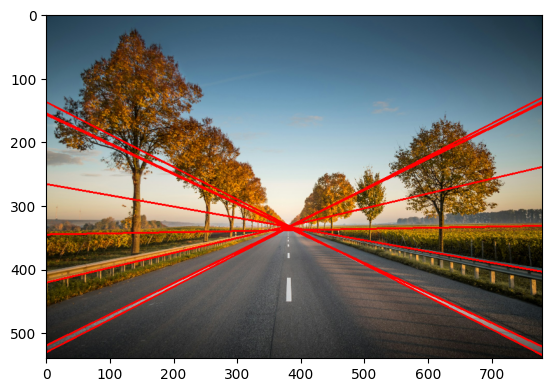

In [145]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR))

** Write Discussion based on your findings